In [102]:
import requests
import json
import matplotlib.pyplot as plt
import pandas as pd

Make an API request that returns the months where "fire" was searched in 2016. Which month had the most searches?

In [39]:
endpoint = "https://data.nashville.gov/resource/kwnd-qrrm.json?$where=date_extract_y(call_rec) = 2016 and tencode = '61'"

response = requests.get(endpoint)

In [40]:
response

<Response [200]>

In [41]:
response.text

'[{"event_number":"PD201600375304","call_rec":"2016-04-11T22:46:09.000","tencode":"61","description":"FIRE","tencode_suf":"P","tencode_suf_description":"PROGRESS","disposition_code":"10","disposition_description":"NO RESPONSE","unit_dispatched":"220C","shift":"B","sector":"E","zone":"211","rpa":"1115"}\n,{"event_number":"PD201601071812","call_rec":"2016-10-21T17:48:03.000","tencode":"61","description":"FIRE","tencode_suf":"P","tencode_suf_description":"PROGRESS","disposition_code":"11","disposition_description":"DISREGARD / SIGNAL 9","shift":"B","sector":"C","zone":"425","rpa":"4008"}\n,{"event_number":"PD201600706207","call_rec":"2016-07-11T02:02:15.000","tencode":"61","description":"FIRE","tencode_suf":"P","tencode_suf_description":"PROGRESS","disposition_code":"4","disposition_description":"ASSISTED CITIZEN","unit_dispatched":"513C","shift":"C","sector":"H","zone":"511","rpa":"8201"}\n,{"event_number":"PD201601244826","call_rec":"2016-12-10T02:31:51.000","tencode":"61","description"

In [43]:
res = response.json()
res

[{'event_number': 'PD201600375304',
  'call_rec': '2016-04-11T22:46:09.000',
  'tencode': '61',
  'description': 'FIRE',
  'tencode_suf': 'P',
  'tencode_suf_description': 'PROGRESS',
  'disposition_code': '10',
  'disposition_description': 'NO RESPONSE',
  'unit_dispatched': '220C',
  'shift': 'B',
  'sector': 'E',
  'zone': '211',
  'rpa': '1115'},
 {'event_number': 'PD201601071812',
  'call_rec': '2016-10-21T17:48:03.000',
  'tencode': '61',
  'description': 'FIRE',
  'tencode_suf': 'P',
  'tencode_suf_description': 'PROGRESS',
  'disposition_code': '11',
  'disposition_description': 'DISREGARD / SIGNAL 9',
  'shift': 'B',
  'sector': 'C',
  'zone': '425',
  'rpa': '4008'},
 {'event_number': 'PD201600706207',
  'call_rec': '2016-07-11T02:02:15.000',
  'tencode': '61',
  'description': 'FIRE',
  'tencode_suf': 'P',
  'tencode_suf_description': 'PROGRESS',
  'disposition_code': '4',
  'disposition_description': 'ASSISTED CITIZEN',
  'unit_dispatched': '513C',
  'shift': 'C',
  'sector

In [44]:
len(res)

498

In [45]:
endpoint = "https://data.nashville.gov/resource/kwnd-qrrm.json?$select=date_extract_m(call_rec) as month,count(*) as count&$where=date_extract_y(call_rec) = 2016 and tencode = '61'&$group=month"

response = requests.get(endpoint)

In [46]:
response

<Response [200]>

In [47]:
response.text

'[{"month":"1","count":"40"}\n,{"month":"2","count":"34"}\n,{"month":"3","count":"40"}\n,{"month":"4","count":"49"}\n,{"month":"5","count":"42"}\n,{"month":"6","count":"24"}\n,{"month":"7","count":"42"}\n,{"month":"8","count":"43"}\n,{"month":"9","count":"29"}\n,{"month":"10","count":"44"}\n,{"month":"11","count":"63"}\n,{"month":"12","count":"48"}]\n'

In [49]:
res = response.json()
res

[{'month': '1', 'count': '40'},
 {'month': '2', 'count': '34'},
 {'month': '3', 'count': '40'},
 {'month': '4', 'count': '49'},
 {'month': '5', 'count': '42'},
 {'month': '6', 'count': '24'},
 {'month': '7', 'count': '42'},
 {'month': '8', 'count': '43'},
 {'month': '9', 'count': '29'},
 {'month': '10', 'count': '44'},
 {'month': '11', 'count': '63'},
 {'month': '12', 'count': '48'}]

The month with the highest was November.

I realized I was searching the wrong API.  The corrected one is below:

In [68]:
endpoint = "https://data.nashville.gov/resource/fuaa-r5cm.json?year=2016&query_text=fire&$select=month_name,month,year,query_count,query_text"

response = requests.get(endpoint)

In [69]:
response

<Response [200]>

In [70]:
res = response.json()
res

[{'month_name': 'January',
  'year': '2016',
  'query_count': '19',
  'query_text': 'fire'},
 {'month_name': 'February',
  'year': '2016',
  'query_count': '35',
  'query_text': 'fire'},
 {'month_name': 'March',
  'year': '2016',
  'query_count': '32',
  'query_text': 'fire'},
 {'month_name': 'April',
  'year': '2016',
  'query_count': '26',
  'query_text': 'fire'},
 {'month_name': 'May',
  'year': '2016',
  'query_count': '24',
  'query_text': 'fire'},
 {'month_name': 'June',
  'year': '2016',
  'query_count': '31',
  'query_text': 'fire'},
 {'month_name': 'July',
  'year': '2016',
  'query_count': '24',
  'query_text': 'fire'},
 {'month_name': 'August',
  'year': '2016',
  'query_count': '47',
  'query_text': 'fire'},
 {'month_name': 'September',
  'year': '2016',
  'query_count': '36',
  'query_text': 'fire'},
 {'month_name': 'October',
  'year': '2016',
  'query_count': '38',
  'query_text': 'fire'},
 {'month_name': 'November',
  'year': '2016',
  'query_count': '32',
  'query_text

December had the most searches for "fire"

2. Make an API request that returns all the times a query was run more than 100 times in a month. How many times did this occur?

In [71]:
endpoint = 'https://data.nashville.gov/resource/fuaa-r5cm.json?$where=query_count>100&$select=month_name,month,year,query_count,query_text&$group=month_name,month,year,query_count,query_text'

response = requests.get(endpoint)

In [72]:
response

<Response [200]>

In [73]:
res = response.json()
res

[{'month_name': 'January',
  'month': '1',
  'year': '2020',
  'query_count': '103',
  'query_text': 'Permits'},
 {'month_name': 'August',
  'month': '8',
  'year': '2020',
  'query_count': '152',
  'query_text': 'recycle'},
 {'month_name': 'January',
  'year': '2017',
  'query_count': '124',
  'query_text': 'human resources'},
 {'month_name': 'April',
  'year': '2017',
  'query_count': '110',
  'query_text': 'short term rental'},
 {'month_name': 'July',
  'year': '2015',
  'query_count': '107',
  'query_text': 'human resources'},
 {'month_name': 'November',
  'month': '11',
  'year': '2019',
  'query_count': '122',
  'query_text': 'holidays'},
 {'month_name': 'July',
  'year': '2015',
  'query_count': '116',
  'query_text': 'animal control'},
 {'month_name': 'August',
  'month': '8',
  'year': '2019',
  'query_count': '193',
  'query_text': 'HUMAN RESOURCES'},
 {'month_name': 'August',
  'year': '2018',
  'query_count': '135',
  'query_text': 'pay plan'},
 {'month_name': 'December',
 

In [74]:
len(res)

1000

With len, it says it happened 1000 times.

3. Make another API request that returns all the times "codes" was searched more than 100 times in a month. How many times did this occur?

In [79]:
endpoint = 'https://data.nashville.gov/resource/fuaa-r5cm.json?$where=query_count>100&query_text=codes&$select=month_name,month,year,query_count,query_text&$group=month_name,month,year,query_count,query_text'

response = requests.get(endpoint)

In [80]:
response

<Response [200]>

In [81]:
res = response.json()
res

[{'month_name': 'April',
  'month': '4',
  'year': '2019',
  'query_count': '168',
  'query_text': 'codes'},
 {'month_name': 'April',
  'month': '4',
  'year': '2021',
  'query_count': '102',
  'query_text': 'codes'},
 {'month_name': 'April',
  'year': '2016',
  'query_count': '111',
  'query_text': 'codes'},
 {'month_name': 'April',
  'year': '2017',
  'query_count': '190',
  'query_text': 'codes'},
 {'month_name': 'April',
  'year': '2018',
  'query_count': '170',
  'query_text': 'codes'},
 {'month_name': 'August',
  'month': '8',
  'year': '2019',
  'query_count': '156',
  'query_text': 'codes'},
 {'month_name': 'August',
  'month': '8',
  'year': '2020',
  'query_count': '178',
  'query_text': 'codes'},
 {'month_name': 'August',
  'year': '2015',
  'query_count': '117',
  'query_text': 'codes'},
 {'month_name': 'August',
  'year': '2016',
  'query_count': '104',
  'query_text': 'codes'},
 {'month_name': 'August',
  'year': '2017',
  'query_count': '222',
  'query_text': 'codes'},
 

In [82]:
len(res)

56

4. Make an API request that returns the entire Top 500 Monthly Searches dataset. Make a chart that shows the number of times "maps" was searched in a month across the entire time frame.

In [91]:
endpoint = 'https://data.nashville.gov/resource/fuaa-r5cm.json?$where=query_text="maps"&$select=month_name,sum(query_count)&$group=month_name'
response = requests.get(endpoint)

In [92]:
response

<Response [200]>

In [94]:
res = response.json()
res

[{'month_name': 'April', 'sum_query_count': '1309'},
 {'month_name': 'August', 'sum_query_count': '991'},
 {'month_name': 'December', 'sum_query_count': '556'},
 {'month_name': 'February', 'sum_query_count': '832'},
 {'month_name': 'January', 'sum_query_count': '924'},
 {'month_name': 'July', 'sum_query_count': '1062'},
 {'month_name': 'June', 'sum_query_count': '1216'},
 {'month_name': 'March', 'sum_query_count': '1090'},
 {'month_name': 'May', 'sum_query_count': '1019'},
 {'month_name': 'November', 'sum_query_count': '805'},
 {'month_name': 'October', 'sum_query_count': '981'},
 {'month_name': 'September', 'sum_query_count': '951'}]

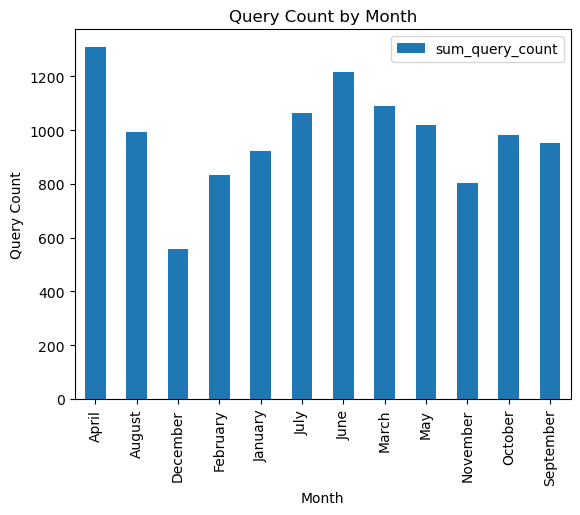

In [106]:
query = pd.DataFrame(res)

query['sum_query_count'] = pd.to_numeric(query['sum_query_count'])

query.plot(kind='bar', x='month_name', y='sum_query_count')
plt.title('Query Count by Month')
plt.xlabel('Month')
plt.ylabel('Query Count')
plt.show()

April had the highest month.